# Python Fundamentals

In [1]:
import pandas as pd
df_article = pd.read_csv('articleInfo.csv')
df_author = pd.read_csv('authorInfo.csv')

In [2]:
# Merge article and author info based on article number
merge_df = pd.merge(df_article, df_author, how='outer', on='Article No.')
print(merge_df.head(5))

# Replace NaN as 0
merge_df = merge_df.fillna(0)

   Article No.                                              Title  Year  \
0            1  Study of Virtual Reality Immersive Technology ...  2022   
1            1  Study of Virtual Reality Immersive Technology ...  2022   
2            1  Study of Virtual Reality Immersive Technology ...  2022   
3            2  Factors Influencing Nursing Students' Immersiv...  2021   
4            2  Factors Influencing Nursing Students' Immersiv...  2021   

   Author Number                                          Key Words  Citation  \
0            3.0  virtual reality technologies, mathematics lear...       7.0   
1            3.0  virtual reality technologies, mathematics lear...       7.0   
2            3.0  virtual reality technologies, mathematics lear...       7.0   
3            2.0  virtual reality; learning; immersive media tec...       3.0   
4            2.0  virtual reality; learning; immersive media tec...       3.0   

                    Source                                    

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Year
2017     13
2018     23
2019     26
2020     93
2021    133
2022    183
Name: Title, dtype: int64


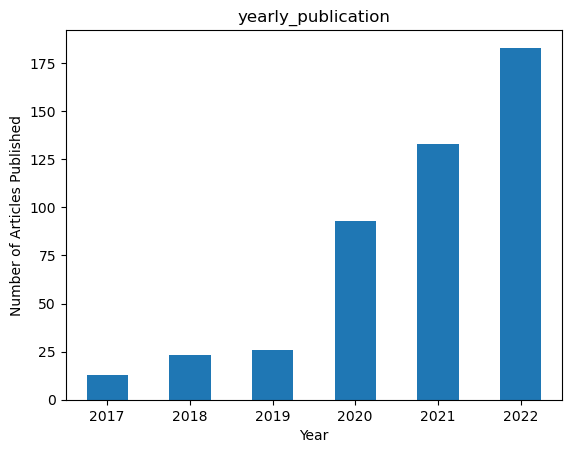

In [4]:
# Plotting yearly_publication graph
# Compute the count of articles on each year
df_publication = merge_df.groupby('Year')['Title'].count()
print(df_publication)

# Labeling
df_publication.plot(kind='bar')
plt.title('yearly_publication')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Articles Published')
plt.show()

Year
2017    3788.0
2018    1974.0
2019    1933.0
2020    2305.0
2021    1735.0
2022     469.0
Name: Citation, dtype: float64


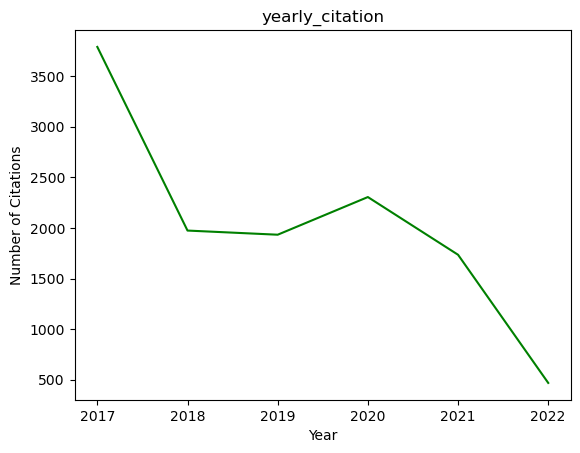

In [5]:
# Sum citations by year
# Clean the duplicates and count citations by year
# print(df_citation)

# Don't need to clean duplicates, count them all
df_citation = merge_df.groupby('Year')['Citation'].sum()
print(df_citation)

df_citation.plot(kind='line', color='green')
plt.title('yearly_citation')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Citations')
plt.show()

In [6]:
import geopandas
import geoplot
import pycountry
import pycountry_convert as pc
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# Create helpful functions
def clean_country(df):
    countrydict = {'Korea': 'Korea, Republic of', 'Taiwan': 'Taiwan, Province of China',
                    'USA': 'United States of America', 'Denamrk': 'Denmark'}
    df.replace({'Country' : countrydict}, inplace = True)
    return df
    return country_code

def convert_code(column):
    ISO_Code = []
    for country in column:
        try:
            code = pc.country_name_to_country_alpha3(country)
            ISO_Code.append(code)
        except:
            ISO_Code.append('NaN')
    return ISO_Code

In [8]:
# Clean data from merge_df and count number of publication by country
df_country = merge_df.copy()
df_country = clean_country(df_country)
df_country['ISO_Code'] = convert_code(df_country['Country'])
df_country = df_country.groupby('ISO_Code')['Article No.'].count()
df_country = df_country.to_frame()
df_country = df_country.drop(['NaN'])
df_country.reset_index(inplace=True)
df_country.columns = ['ISO_Code', 'Count']

<AxesSubplot: >

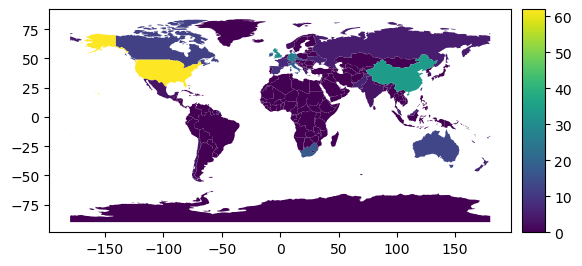

In [9]:
# Clean world dataframe and merge with df_country
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.drop(columns=['pop_est', 'gdp_md_est'])
world.columns = ['continent', 'name', 'ISO_Code', 'geometry']
merged = pd.merge(world, df_country, on="ISO_Code", how='outer')
merged['Count'] = merged['Count'].fillna(0)

# Create legend and plot the map
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='Count', ax=ax, cmap='viridis', legend=True, cax=cax)

In [10]:
# Top 5 Institution with most published articles
df_institute = merge_df.groupby('Author Affiliation')['Article No.'].count().sort_values(ascending=False)
df_institute = df_institute.drop([0])
df_institute.index.names = ['Top 5 Institutions with most published articles']
print(df_institute.head(5))
print()

# Top 5 Researchers with highest h-index
df_researchers = merge_df.groupby('Author Name')['h-index'].sum().sort_values(ascending=False)
df_researchers = df_researchers.drop([0])
df_researchers.index.names = ['Top 5 Researchers with highest h-index']
print(df_researchers.head(5))

Top 5 Institutions with most published articles
University of the Western Cape    17
Masaryk University                12
University College Cork           11
Intel Corporation                 11
Madigan Army Medical Center        8
Name: Article No., dtype: int64

Top 5 Researchers with highest h-index
Ulrich Trautwein         95.0
Nicolas Molinari         63.0
George S. Athwal         59.0
Sellappan Palaniappan    48.0
Maria Luisa Lorusso      33.0
Name: h-index, dtype: float64
